In [48]:
# LOGISTIC REGRESSION IMPELEMENTATION
# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
# Training and testing data preperation
training_data = pd.read_csv("../Data/TrainingData.csv")

In [50]:
# Define model, train and test
from sklearn.linear_model import LogisticRegression

features = training_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count", "home_team_result"  ], axis=1)
targets = training_data['home_team_result'].values 
training_features , training_targets = features, targets

testing_data = pd.read_csv("../Data/TestingData.csv")
target_from_old_csv  = pd.read_csv('../Data/Dataset.csv')["home_team_result"].tail(16).values

print(testing_data)


test_features = testing_data.drop(["home_team_name", "away_team_name", "home_team_goal_count" ,"away_team_goal_count" ], axis=1)
test_target = target_from_old_csv

# print(test_target)

# testing_features, testing_targets = test_features, test_target

# model = LogisticRegression(max_iter = 1000)

# model.fit(training_features, training_targets)

# outcome_predict = model.predict(testing_features)

# print(outcome_predict)

# # print(model.predict(testing_features))
# print(model.score(testing_features, testing_targets))




    home_team_name  away_team_name  home_team_goal_count  \
0               10               0              1.000000   
1               31              21              1.666667   
2               27              22              2.000000   
3                6               7              2.333333   
4                3              15              1.666667   
5                2              14              3.000000   
6               28              29              1.666667   
7                4               9              1.666667   
8               31              10              1.666667   
9                3               2              1.666667   
10              28               9              1.666667   
11              22               6              2.666667   
12              10               2              1.000000   
13               6               9              2.333333   
14               2               9              3.000000   
15              10               6      

In [13]:
# Generate graphs
from sklearn.metrics import confusion_matrix 

cf_matrix = confusion_matrix(outcome_predict,test_target)

print(cf_matrix)



[[18  6]
 [ 7 16]]


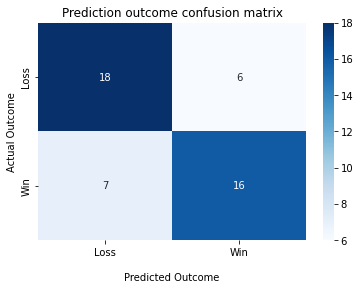

In [12]:
import seaborn as sns 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Prediction outcome confusion matrix')
ax.set_xlabel('\nPredicted Outcome')
ax.set_ylabel('Actual Outcome');

ax.xaxis.set_ticklabels(['Loss','Win'])
ax.yaxis.set_ticklabels(['Loss','Win'])

plt.show()
# fig = plt.figure()
# fig.savefig("anything.png")